<a href="https://colab.research.google.com/github/LindaNciko/Applied-Machine-Learning/blob/main/PREDICTIVE_OPTIMIZATION_ANALYTICS_CAT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTIVE OPTIMIZATION ANALYTICS CAT 2

## Claudine Linda Wa Nciko

### Introduction

This notebook focuses on forecasting the stock prices of **Industria de Diseño Textil, S.A. (ITX.MC)**, a Spanish multinational clothing company best known for its popular brands like Zara and Massimo Dutti. The primary objective is to implement and compare various time series forecasting techniques to predict future stock values.  

The forecasting methods applied include:
1. Traditional Methods (ARIMA, SARIMA)
2. Machine Learning Methods (Linear Regression, Random Forest)
3. Prophet (Facebook Prophet)
4. Neural Networks (LSTM - Long Short-Term Memory

The analysis spans historical data from **January 1, 2015, to December 31, 2024**.


In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from  statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_percentage_error

pd.set_option('display.float_format',lambda x: '%.2f' %x) # Set floats to be displayed to 2 decimal places

 ## Task 1: Data Preparation
• Load and inspect the dataset.

• Convert the Date column to a datetime object and set it as the index.

• Visualize the time series data.

• Handle missing values if present.


In [ ]:
import yfinance as yf

In [ ]:
#Downloading the dataset from Industria de Diseño Textil: the Spanish multinational clothing company best known for brands like Zara & Massimo

# Define the stock symbol
dat = yf.Ticker("ITX.MC")

#the historical data from Jan 2015 to Dec 2024
df = dat.history(start="2015-01-01", end="2024-12-31")["Close"]


In [ ]:
df.head()

,Close
Date,
2015-01-02 00:00:00+01:00,19.15
2015-01-05 00:00:00+01:00,18.50
2015-01-06 00:00:00+01:00,18.27
2015-01-07 00:00:00+01:00,18.49
2015-01-08 00:00:00+01:00,19.25


In [ ]:
#Converting the Date column to a datetime object and set it as the index.
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Set the date as the index
df.sample(2)


,Close
Date,
2023-12-15 00:00:00+01:00,37.41
2015-09-17 00:00:00+02:00,24.98


In [ ]:
#Checking for missing values
df.isna().sum()

,0
Close,0


The data does not have missing value

In [ ]:
# Descriptive statistics
df.describe()

,Close
count,2558.00
mean,27.02
std,7.25
min,17.89
25%,22.80
50%,25.02
75%,27.93
max,55.98


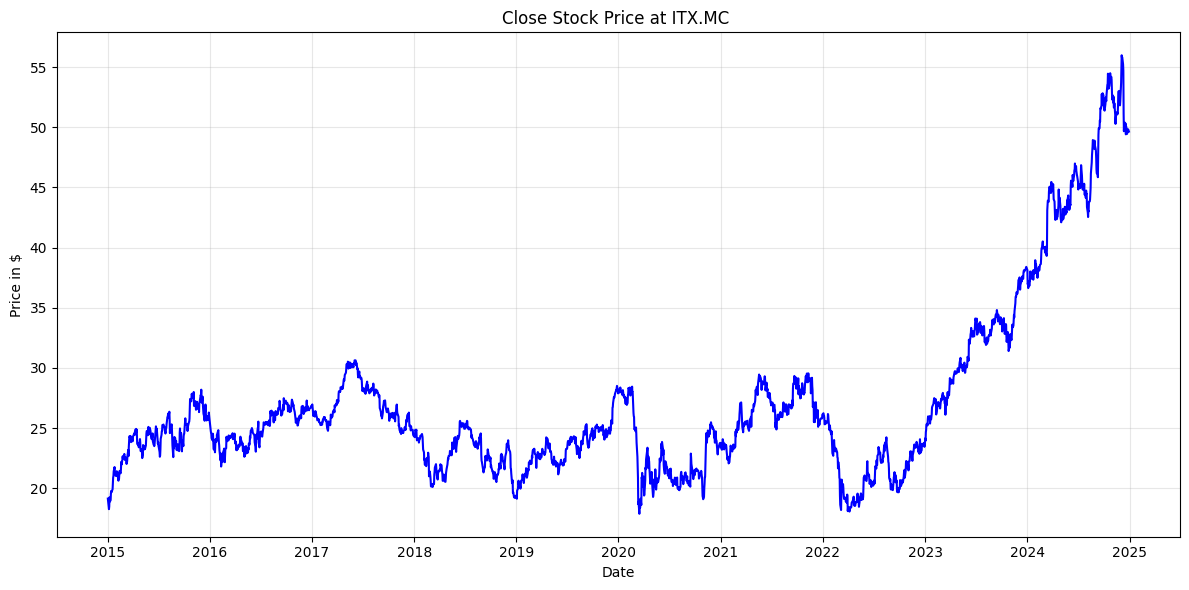

In [ ]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue')
plt.title('Close Stock Price at ITX.MC ')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('ITX.MC _stock_price.png')
plt.show()

The stock price of ITX.MC has shown strong long-term growth, with some sharp drops around 2020 (likely due to COVID-19) and 2022, followed by a steady upward trend from 2023 onwards. The price is currently at all-time highs, suggesting strong performance.

 ## Task 2: Traditional Methods
1. ARIMA Model

o Perform ACF and PACF analysis to identify the p and q parameters.

o Fit an ARIMA model and tune hyperparameters for optimal results.

o Evaluate the model using appropriate metrics (RMSE, MAE, MAPE).

2. SARIMA Model

o Introduce seasonality into the model.

o Compare SARIMA results with ARIMA.

**ARIMA MODEL**

In [ ]:
# Test stationarity using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(df['Close'])
print(f'ADF Statistic: {statistic[0]}')
print(f'p-value: {statistic[1]}')

ADF Statistic: -0.03466846103456159
p-value: 0.9555693847874058


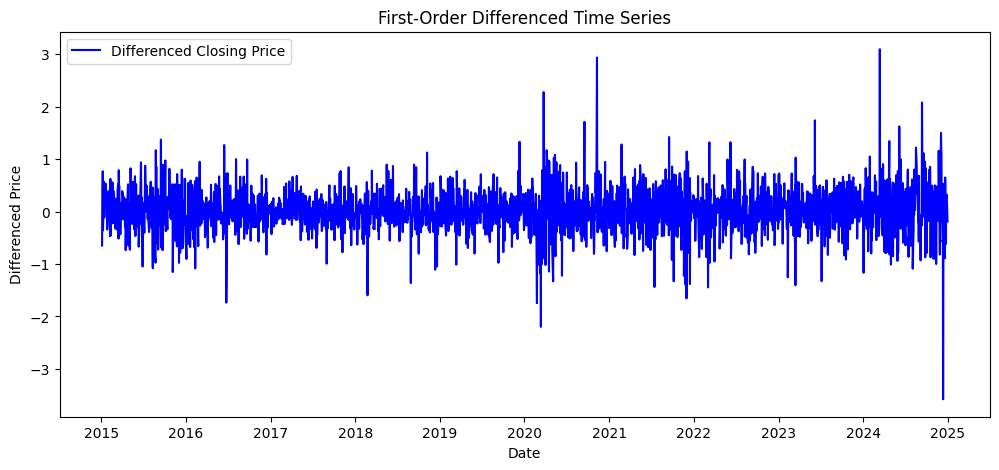

ADF Statistic (Differenced): -50.135388277173384
p-value (Differenced): 0.0


In [ ]:
# If the data is non-stationary, apply differencing
df = df.copy()

df['Close_diff'] = df['Close'].diff().dropna()

plt.figure(figsize=(12,5))
plt.plot(df['Close_diff'], label='Differenced Closing Price', color='blue')
plt.title('First-Order Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

# Perform ADF Test Again on Differenced Data
result = adfuller(df['Close_diff'].dropna())
print(f'ADF Statistic (Differenced): {result[0]}')
print(f'p-value (Differenced): {result[1]}')

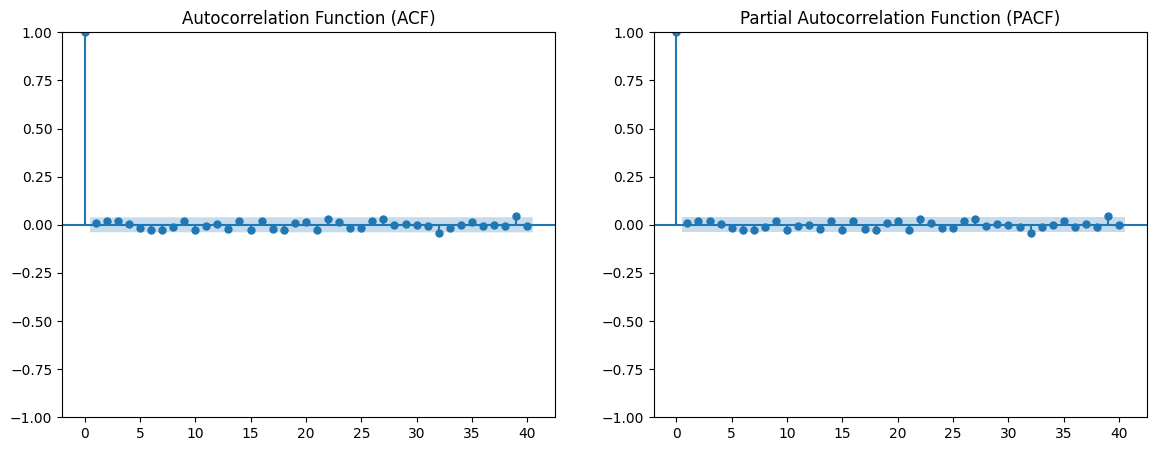

In [ ]:
#ACF and PACF analysis to identify the p and q parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# ACF Plot (q selection)
plot_acf(df['Close_diff'].dropna(), ax=ax[0], lags=40)
ax[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot (p selection)
plot_pacf(df['Close_diff'].dropna(), ax=ax[1], lags=40)
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

The ACF and PACF plots both show a sharp drop after lag 1 and remain near zero afterward, indicating that the series is likely stationary with minimal autocorrelation and partial autocorrelation beyond lag 1.

In [ ]:
# Fitting the ARIMA(1,0,1) model
from statsmodels.tsa.arima.model import ARIMA
model_arima= ARIMA(df['Close'], order=(1,0,1))
model_arima_fitted = model_arima.fit()

#Summary of the model
print(model_arima_fitted.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2558
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1441.669
Date:                Thu, 20 Mar 2025   AIC                           2891.338
Time:                        15:40:36   BIC                           2914.726
Sample:                             0   HQIC                          2899.819
                               - 2558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0231     69.371      0.390      0.697    -108.942     162.989
ar.L1          0.9999      0.000   3019.962      0.000       0.999       1.001
ma.L1          0.0086      0.015      0.574      0.5

In [ ]:
predictions_arima = model_arima_fitted.forecast(steps=5)

last_observed_value = df['Close'].iloc[-1]
predicted_values_arima = last_observed_value + predictions_arima.cumsum()

predicted_data_arima = pd.DataFrame({
    'Date': pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5),
    'Predicted_Close': predicted_values_arima
})
predicted_data_arima.set_index('Date', inplace=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
predicted_data_arima.sample(4)

,Predicted_Close
Date,
2025-01-02 00:00:00+01:00,198.54
2025-01-04 00:00:00+01:00,297.79
2025-01-03 00:00:00+01:00,248.17
2024-12-31 00:00:00+01:00,99.28


In [ ]:
# Trace for the original close prices
trace_original = go.Scatter(
                x=df.index,
                y=df['Close'],
                mode='lines',
                name='Original Close Prices',
                line=dict(color='blue')
            )

trace_predicted = go.Scatter(
                      x=predicted_data_arima.index,
                      y=predicted_data_arima['Predicted_Close'],
                      mode='lines',
                      name='Predicted Close Prices',
                      line=dict(color='red', dash='dash')
                  )

# Create the layout for the plot
layout = go.Layout(
                title='Original vs. Predicted Close Prices (ARIMA Model)',
                xaxis=dict(title='Date'),
                yaxis=dict(title='Close Price'),
                template='plotly_dark'
            )

fig = go.Figure(data=[trace_original, trace_predicted], layout=layout)
fig.show()

In [ ]:
#ARIMA Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
#Sarima Model Evaluation
actual_values = df['Close'].iloc[:5].values

# Extract predicted values
predicted_values_sarima = predicted_data_arima['Predicted_Close'].values

# MAE
mae = mean_absolute_error(actual_values, predicted_values_arima)

# RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values_arima))

# MAPE
mape = np.mean(np.abs((actual_values - predicted_values_arima) / actual_values)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

MAE: 179.80208415074338
RMSE: 193.0053632033511
MAPE: 959.76%


**SARIMA MODEL**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
seasonal_order = (0, 0, 0, 12)  # p=0, d=1, q=0, seasonal_period=12 the seasonal period is 12 months


model_sarima   = SARIMAX(df['Close'], order=(1, 0, 1), seasonal_order=seasonal_order)
model_sarima_fitted = model_sarima.fit()


print(model_sarima_fitted.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2558
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1442.397
Date:                Thu, 20 Mar 2025   AIC                           2890.795
Time:                        15:50:24   BIC                           2908.336
Sample:                             0   HQIC                          2897.156
                               - 2558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   6360.991      0.000       1.000       1.000
ma.L1          0.0089      0.015      0.592      0.554      -0.021       0.038
sigma2         0.1802      0.003     67.846      0.0

In [ ]:
predictions_sarima = model_sarima_fitted.get_forecast(steps=5)

# Extract predicted values and confidence intervals
predicted_values_sarima = predictions_sarima.predicted_mean
confidence_intervals    = predictions_sarima.conf_int()

# Revert the differencing (cumulative sum of the predictions)
last_observed_value             = df['Close'].iloc[-1]
predicted_values_sarima_cumsum = last_observed_value + predicted_values_sarima.cumsum()


predicted_data_sarima = pd.DataFrame({
                                      'Date': pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5),
                                      'Predicted_Close': predicted_values_sarima_cumsum
                                  })
predicted_data_sarima.set_index('Date', inplace=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
predicted_data_sarima.sample(2)

,Predicted_Close
Date,
2025-01-03 00:00:00+01:00,248.16
2024-12-31 00:00:00+01:00,99.27


In [ ]:
# Create the trace for the original close prices
trace_original = go.Scatter(
                x=df.index,
                y=df['Close'],
                mode='lines',
                name='Original Close Prices',
                line=dict(color='blue')
            )

trace_predicted = go.Scatter(
                      x=predicted_data_sarima.index,
                      y=predicted_data_sarima['Predicted_Close'],
                      mode='lines',
                      name='Predicted Close Prices',
                      line=dict(color='red', dash='dash')
                  )

# Create the layout for the plot
layout = go.Layout(
                title='Original vs. Predicted Close Prices (ARIMA Model)',
                xaxis=dict(title='Date'),
                yaxis=dict(title='Close Price'),
                template='plotly_dark'
            )

fig = go.Figure(data=[trace_original, trace_predicted], layout=layout)
fig.show()

In [ ]:
#Sarima Model Evaluation
actual_values = df['Close'].iloc[:5].values

# Extract predicted values
predicted_values_sarima = predicted_data_sarima['Predicted_Close'].values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values_sarima)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values_sarima))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - predicted_values_sarima) / actual_values)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

MAE: 179.7976808833372
RMSE: 193.00014217076117
MAPE: 959.73%


In [ ]:
# ARIMA Model Evaluation
actual_values = df['Close'].iloc[:5].values

# Extract predicted values
predicted_values_arima = predicted_data_arima['Predicted_Close'].values
predicted_values_sarima = predicted_data_sarima['Predicted_Close'].values

# ARIMA Metrics
mae_arima = mean_absolute_error(actual_values, predicted_values_arima)
rmse_arima = np.sqrt(mean_squared_error(actual_values, predicted_values_arima))
mape_arima = np.mean(np.abs((actual_values - predicted_values_arima) / actual_values)) * 100

# SARIMA Metrics
mae_sarima = mean_absolute_error(actual_values, predicted_values_sarima)
rmse_sarima = np.sqrt(mean_squared_error(actual_values, predicted_values_sarima))
mape_sarima = np.mean(np.abs((actual_values - predicted_values_sarima) / actual_values)) * 100

# Compare ARIMA and SARIMA models
print("\nARIMA vs SARIMA Performance Comparison:")

# Create a DataFrame to display key metrics
comparison_df = pd.DataFrame({
    'ARIMA': [rmse_arima, mae_arima, mape_arima],
    'SARIMA': [rmse_sarima, mae_sarima, mape_sarima]
}, index=['RMSE', 'MAE', 'MAPE'])

# Print the comparison table
print(comparison_df)



ARIMA vs SARIMA Performance Comparison:
      ARIMA  SARIMA
RMSE 193.01  193.00
MAE  179.80  179.80
MAPE 959.76  959.73


Both ARIMA and SARIMA models have very similar performance, with almost identical RMSE, MAE, and MAPE values, indicating that incorporating seasonality (SARIMA) did not significantly improve the forecasting accuracy.

## Task 3: Machine Learning Methods
• Implement and compare at least two different models (Linear Regression, Random Forest).

• Use appropriate feature engineering techniques (lagged features, rolling means).

• Split the data into training and testing datasets.

• Evaluate models using RMSE, MAE, and MAPE

In [ ]:
# Using the same dataset
# A copy of the 'Close' column
df_ml= df[['Close']].copy()
df_ml.reset_index(inplace=True)


# Convert to datetime
df_ml['Date'] = pd.to_datetime(df_ml['Date'])
 # Set 'Date' back as index
df_ml.set_index('Date', inplace=True)

In [ ]:
df_ml.columns

Index(['Close'], dtype='object')

In [ ]:
# Feature Engineering

def create_lag_features(df, lag=5):

    for i in range(1, lag+1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

In [ ]:
# Create lag features
lag          = 5
df_lagged = create_lag_features(df_ml, lag)
df_lagged.sample(7)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2016-03-04 00:00:00+01:00,24.22,23.91,24.18,24.28,23.33,23.24
2016-05-17 00:00:00+02:00,22.98,23.13,23.17,22.91,23.06,23.51
2017-04-05 00:00:00+02:00,27.20,27.35,27.08,27.34,26.93,27.04
2020-07-03 00:00:00+02:00,21.28,21.58,20.83,20.90,21.20,21.06
2017-11-23 00:00:00+01:00,24.60,24.60,24.67,24.79,24.59,25.00
2016-01-07 00:00:00+01:00,24.52,24.60,24.76,24.93,25.84,26.10
2023-08-28 00:00:00+02:00,33.27,32.91,32.70,32.85,33.18,32.81


In [ ]:
#Define target and predictor Variables
X = df_lagged.drop('Close', axis=1)
y = df_lagged['Close']

In [ ]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred_lr = lr.predict(X_test)
mae = mean_absolute_percentage_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mape = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

print('Linear Regression Evaluation Metrics')
print(f"MAE: {mae*100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

Linear Regression Evaluation Metrics
MAE: 1.08%
RMSE: 0.57
MAPE: 1.08%


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, max_depth=3,random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=50, random_state=42)

In [ ]:
#RF Predictions
y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_percentage_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print('Random Forest Evaluation Metrics')
print(f"MAE: {mae*100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

Random Forest Evaluation Metrics
MAE: 21.87%
RMSE: 12.47
MAPE: 21.87%


## Combining Linear regresssion and Random Forest

In [ ]:
# Combining actual values and predictions for RF & LR
forecast_df = pd.DataFrame({
    'Actual': y_test,
    'LR_Predicted': y_pred_lr,  # Linear Regression predictions
    'RF_Predicted': y_pred_rf   # Random Forest predictions
}, index=y_test.index)

print(forecast_df.head())


                           Actual  LR_Predicted  RF_Predicted
Date                                                         
2022-12-30 00:00:00+01:00   23.45         23.78         23.58
2023-01-02 00:00:00+01:00   24.16         23.47         23.58
2023-01-03 00:00:00+01:00   23.95         24.14         23.98
2023-01-04 00:00:00+01:00   24.68         23.97         23.66
2023-01-05 00:00:00+01:00   24.84         24.67         24.79


In [ ]:
import plotly.graph_objects as go

def plot_ml_results(df, forecast_df):
    fig = go.Figure()

    # Actual Data
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Close'], mode='lines', name='Actual Data',
        line=dict(color='blue', width=2)
    ))

    #Linear Regression Predictions
    fig.add_trace(go.Scatter(
        x=forecast_df.index, y=forecast_df['LR_Predicted'], mode='lines', name='Linear Regression',
        line=dict(color='green', dash='dot', width=2)
    ))

    # Random Forest Predictions
    fig.add_trace(go.Scatter(
        x=forecast_df.index, y=forecast_df['RF_Predicted'], mode='lines', name='Random Forest',
        line=dict(color='red', dash='dot', width=2)
    ))

    # Layout Settings
    fig.update_layout(
        title='Actual vs Predicted Prices (LR & RF)',
        xaxis_title='Date',
        yaxis_title='Close Price',
        template='plotly_dark',
        legend=dict(x=0.01, y=0.99),
        showlegend=True
    )

    fig.show()


plot_ml_results(df, forecast_df)


 ## Task 4: Prophet Model
• Implement Facebook Prophet for time series forecasting.

• Include special event handling (Holidays).

• Perform cross-validation and hyperparameter tuning.

• Compare predictions with Traditional and Machine Learning models.

In [ ]:
from prophet import Prophet

In [ ]:
#Using the same data from ITX.MC
# Define the stock symbol
dat = yf.Ticker("ITX.MC")

#the historical data from Jan 2015 to Dec 2024
df_pr= dat.history(start="2015-01-01", end="2024-12-31")["Close"]
df_pr.head()

,Close
Date,
2015-01-02 00:00:00+01:00,19.15
2015-01-05 00:00:00+01:00,18.50
2015-01-06 00:00:00+01:00,18.27
2015-01-07 00:00:00+01:00,18.49
2015-01-08 00:00:00+01:00,19.25


In [ ]:
df_pr = pd.DataFrame(df_pr)
df_pr.reset_index(inplace=True)
df_pr.columns = ['ds', 'y']
df_pr.tail()

,ds,y
2553,2024-12-20 00:00:00+01:00,50.06
2554,2024-12-23 00:00:00+01:00,49.44
2555,2024-12-24 00:00:00+01:00,49.51
2556,2024-12-27 00:00:00+01:00,49.83
2557,2024-12-30 00:00:00+01:00,49.64


In [ ]:
df_pr.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
print('Maximum date',df_pr['ds'].max())
print('Minimum date',df_pr['ds'].min())

Maximum date 2024-12-30 00:00:00+01:00
Minimum date 2015-01-02 00:00:00+01:00


In [ ]:
#Fit Prophet
df_pr['ds'] = pd.to_datetime(df_pr['ds']).dt.tz_localize(None) #Removing timezone
model_pr = Prophet()
model_pr.fit(df_pr)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/zig5a77m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_y3eze2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49459', 'data', 'file=/tmp/tmpshx0r3sg/zig5a77m.json', 'init=/tmp/tmpshx0r3sg/_y3eze2_.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelgkb204nq/prophet_model-20250320162026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_pr['ds'].diff().value_counts()


,count
ds,
1 days,2026
3 days,498
4 days,14
5 days,12
2 days,7


The data shows inconsistent time intervals with counts recorded for 1, 2, 3, 4, and 5 days, indicating irregular frequency that needs to be standardized to a daily frequency.

In [ ]:
# Making the frequency daily and filling missing values with NaNs
df_pr = df_pr.set_index('ds').asfreq('D').reset_index()

# Linear interpolation of the missing values
df_pr['y'] = df_pr['y'].interpolate(method='linear')

# Display the resulting DataFrame
print(df_pr.head())


          ds     y
0 2015-01-02 19.15
1 2015-01-03 18.93
2 2015-01-04 18.72
3 2015-01-05 18.50
4 2015-01-06 18.27


The dataset now has a consistent daily frequency, with missing values linearly interpolated to maintain a smooth time series.

In [ ]:
df_pr['ds'].diff().value_counts()

,count
ds,
1 days,3650


Now the dataset has a consistent daily frequency with a difference of 1 day between consecutive dates for 3650 occurrences.

In [ ]:
# create future dates
future = model_pr.make_future_dataframe(periods=365, freq='B') # Only working with business days since no trading happens on the weekends
future.head()

,ds
0,2015-01-02
1,2015-01-05
2,2015-01-06
3,2015-01-07
4,2015-01-08


In [ ]:
#Forecasting
forecast = model_pr.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2918,2026-05-19,72.18,60.81,83.93
2919,2026-05-20,72.26,61.33,84.01
2920,2026-05-21,72.33,61.00,84.03
2921,2026-05-22,72.38,60.72,84.23
2922,2026-05-25,72.66,61.02,84.80


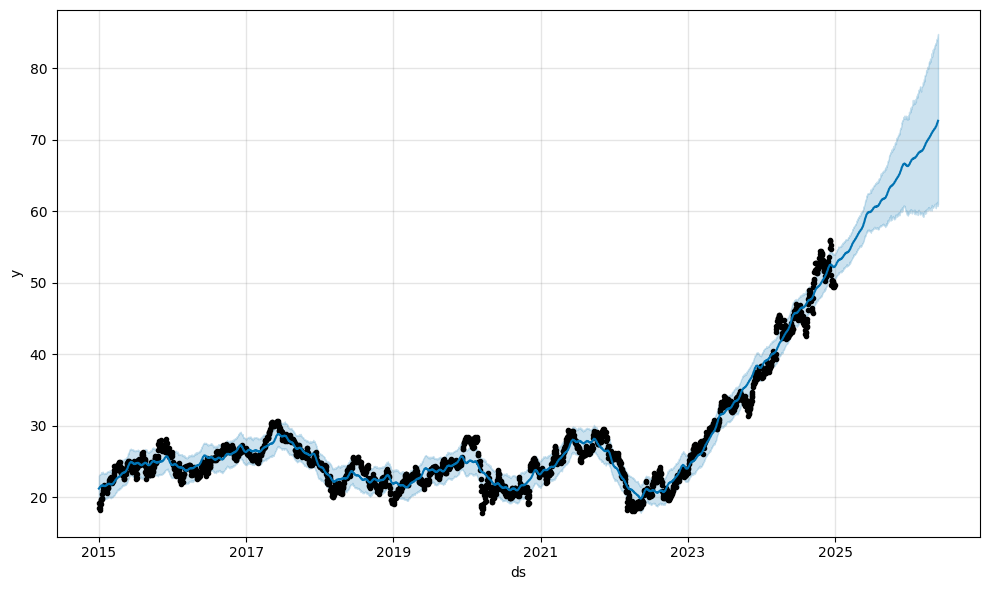

In [ ]:
#plot
fig1 = model_pr.plot(forecast)

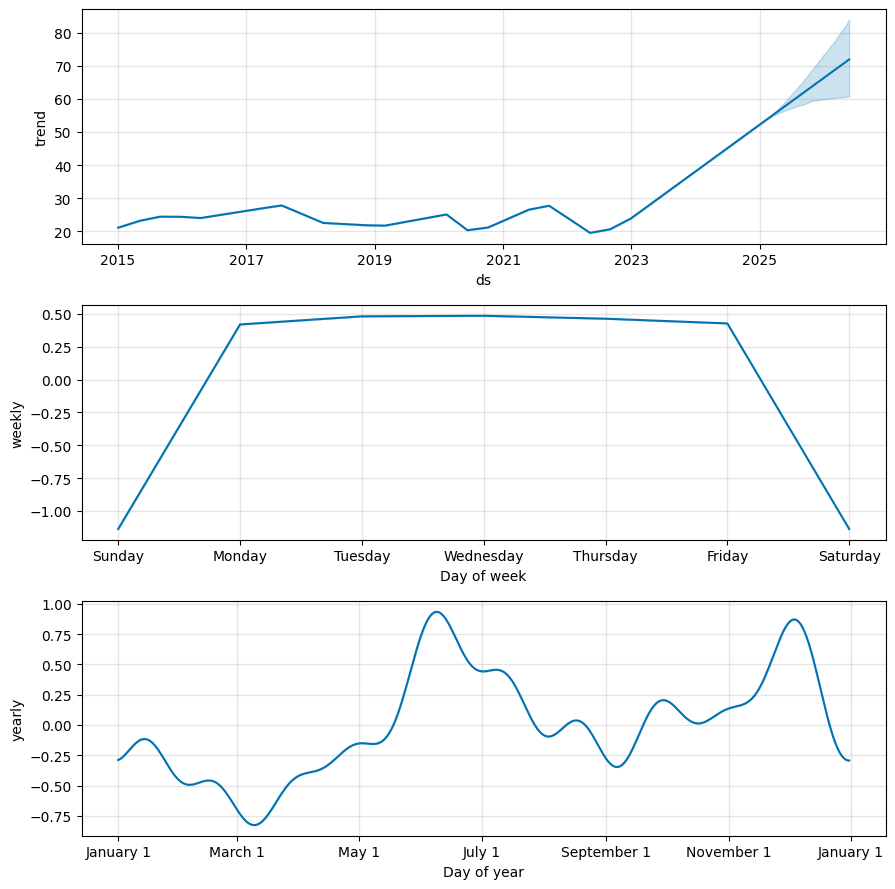

In [ ]:
fig2 = model_pr.plot_components(forecast)

**Holiday Effects**
Since Industria de Diseño Textil (ITX.MC) is a Spanish company, it follows the Madrid Stock Exchange (Bolsa de Madrid) calendar. Generally:

- Weekends (Saturday & Sunday) → No trading.
- Holidays (subject to change every year):
- New Year's Day (January 1)
- Epiphany (January 6)
- Good Friday (varies)
- Labour Day (May 1)
- National Day (October 12)
- All Saints' Day (November 1)
- Constitution Day (December 6)
- Immaculate Conception (December 8)
- Christmas Day (December 25)


In [ ]:
from prophet.make_holidays import make_holidays_df

In [ ]:
# Initialize the Prophet model
m = Prophet()

# Add holidays for Spain
m.add_country_holidays(country_name='ES')

# Fit the model
m.fit(df_pr)

# Create a future dataframe (ONLY trading days)
future = m.make_future_dataframe(periods=365, freq='B')  # 'B' = Business Days (no weekends)
forecast_pr = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/poym0z_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/87jh6bib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88958', 'data', 'file=/tmp/tmpshx0r3sg/poym0z_3.json', 'init=/tmp/tmpshx0r3sg/87jh6bib.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelmogl6lq3/prophet_model-20250320162642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
m.train_holiday_names

,0
0,New Year's Day
1,Epiphany
2,Good Friday
3,Assumption Day
4,National Day
5,All Saints' Day
6,Constitution Day
7,Immaculate Conception
8,Labor Day
9,Christmas Day


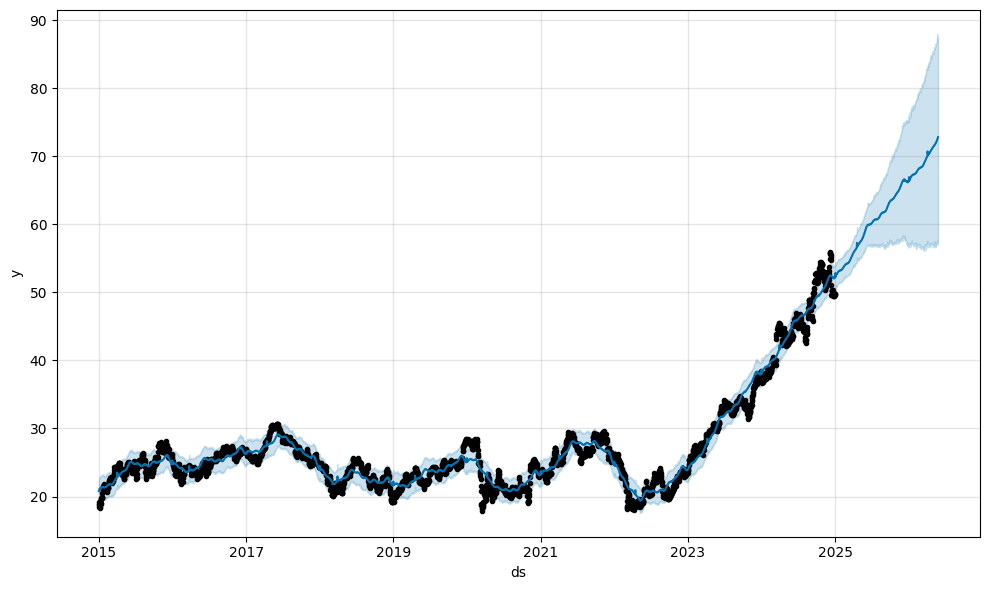

In [ ]:
#Plot
fig3 = m.plot(forecast_pr)

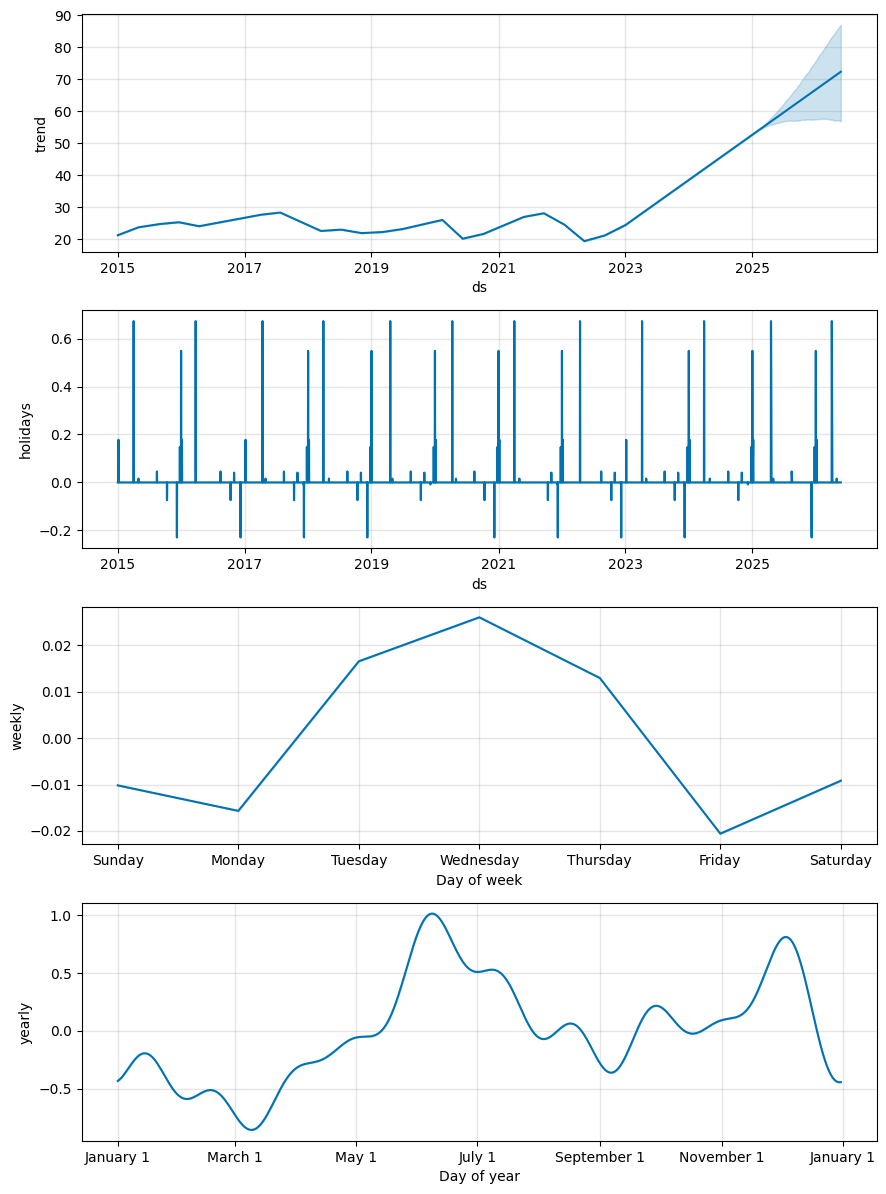

In [ ]:
#Plotting components
fig4 = m.plot_components(forecast_pr)


The forecast plot shows a steady trend from 2015 to 2023, followed by a sharp upward trend from 2024 onwards, significant holiday effects with frequent spikes and drops, a weekly pattern peaking on Wednesdays and dipping on Fridays, and a yearly seasonal pattern with peaks around mid-year (July) and late in the year (November to January).

**Prophet Hyperparameter Tuning**

1. changepoint_prior_scale which Controls flexibility in trend changes.
2. seasonality_prior_scalewhichControls  seasonal effects.
3. holidays_prior_scale which Controls how much holidays impact the model.


The first 1095 days (approximately 3 years) of data are used for training in each fold, a new training set is created every 180 days (approximately 6 months), and the model forecasts 365 days into the future in each fold.

In [ ]:
import itertools
from prophet.diagnostics import cross_validation, performance_metrics

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0, 20.0],
    'holidays_prior_scale': [1.0, 5.0, 10.0, 20.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Store the results
best_params = None
best_rmse = float("inf")

for params in all_params:
    # Create model with current parameters
    model = Prophet(**params)
    model.fit(df_pr)

    # Perform cross-validation with a 3-year initial period
    df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv)

    # Check RMSE (Lower is better)
    rmse = df_p['rmse'].mean()
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_8m7x1dj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/kv9hk7vq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21061', 'data', 'file=/tmp/tmpshx0r3sg/_8m7x1dj.json', 'init=/tmp/tmpshx0r3sg/kv9hk7vq.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelk667ciji/prophet_model-20250320163612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2018-01-31 00:00:00 and 2023-12-31 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/15rt3mtr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/6vi1vhsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49631', 'data', 'file=/tmp/tmpshx0r3sg/15rt3mtr.json', 'init=/tmp/tmpshx0r3sg/6vi1vhsj.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modeloh1qpejm/prophet_model-20250320163613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/oap5c68u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/jjwg8hh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qboytieo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qybt55rr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40446', 'data', 'file=/tmp/tmpshx0r3sg/qboytieo.json', 'init=/tmp/tmpshx0r3sg/qybt55rr.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model0juxsns4/prophet_model-20250320163624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/u28mfnbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/zebiz2uh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/27l1x8c3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/x46ec8ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75568', 'data', 'file=/tmp/tmpshx0r3sg/27l1x8c3.json', 'init=/tmp/tmpshx0r3sg/x46ec8ld.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelwg5s7sln/prophet_model-20250320163632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/gp68xn1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/4yah8wek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/hgjzs014.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/5a4u52c9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76562', 'data', 'file=/tmp/tmpshx0r3sg/hgjzs014.json', 'init=/tmp/tmpshx0r3sg/5a4u52c9.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modeltzl9ca8i/prophet_model-20250320163639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3clcsniz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/sukozq7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0d63jecv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/noo8ncc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65060', 'data', 'file=/tmp/tmpshx0r3sg/0d63jecv.json', 'init=/tmp/tmpshx0r3sg/noo8ncc5.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelvax0ampz/prophet_model-20250320163648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/l2zm297m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/n90mrk_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0pixi4k0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/q3fat1pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73628', 'data', 'file=/tmp/tmpshx0r3sg/0pixi4k0.json', 'init=/tmp/tmpshx0r3sg/q3fat1pw.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelyzhhz60w/prophet_model-20250320163657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/r_9shhni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ock8fvfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/67mao1fl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ubk6bbbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88774', 'data', 'file=/tmp/tmpshx0r3sg/67mao1fl.json', 'init=/tmp/tmpshx0r3sg/ubk6bbbz.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelnne4eiik/prophet_model-20250320163705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7sggdo0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ob56vm6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/jzgn56iv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qkwmhsma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15394', 'data', 'file=/tmp/tmpshx0r3sg/jzgn56iv.json', 'init=/tmp/tmpshx0r3sg/qkwmhsma.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model9a7kxxoy/prophet_model-20250320163714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2glvzb9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/e2og5723.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/fn7_e8t8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/lzus9tbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35919', 'data', 'file=/tmp/tmpshx0r3sg/fn7_e8t8.json', 'init=/tmp/tmpshx0r3sg/lzus9tbc.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model77wnp342/prophet_model-20250320163723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/sq9m1cm3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/q39gvbng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/kbkmsihs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/bs4tjtqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72705', 'data', 'file=/tmp/tmpshx0r3sg/kbkmsihs.json', 'init=/tmp/tmpshx0r3sg/bs4tjtqg.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model7bhf26t2/prophet_model-20250320163731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/dkcpv0oi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/xi_nglbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_m6tkz_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/k247jesv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5180', 'data', 'file=/tmp/tmpshx0r3sg/_m6tkz_4.json', 'init=/tmp/tmpshx0r3sg/k247jesv.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model11nuoie7/prophet_model-20250320163740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_7bsxii4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/byoze2ca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_mno_q89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/kx91e3ff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43281', 'data', 'file=/tmp/tmpshx0r3sg/_mno_q89.json', 'init=/tmp/tmpshx0r3sg/kx91e3ff.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelih773rg2/prophet_model-20250320163750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/1aj6s031.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/fz7fxlpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/d8mvgyqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8zgp37hg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30842', 'data', 'file=/tmp/tmpshx0r3sg/d8mvgyqq.json', 'init=/tmp/tmpshx0r3sg/8zgp37hg.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelmou7mz0m/prophet_model-20250320163758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8a43fddx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/w6dd1nmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/n2x6ta75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/mlp_9l0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8049', 'data', 'file=/tmp/tmpshx0r3sg/n2x6ta75.json', 'init=/tmp/tmpshx0r3sg/mlp_9l0j.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelqngny66f/prophet_model-20250320163807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/jfj4w1qu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/f4z7wofp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/f83s0xay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7b0lobo8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48213', 'data', 'file=/tmp/tmpshx0r3sg/f83s0xay.json', 'init=/tmp/tmpshx0r3sg/7b0lobo8.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model5vs15fpv/prophet_model-20250320163815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/xhuexs9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/g0ak5w36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/r4lt6bnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/u12kaxok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18715', 'data', 'file=/tmp/tmpshx0r3sg/r4lt6bnc.json', 'init=/tmp/tmpshx0r3sg/u12kaxok.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelfxkzwtv7/prophet_model-20250320163823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/4mt5yfuk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/gn5887pa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/yhqifn6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/n33xi9zw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50108', 'data', 'file=/tmp/tmpshx0r3sg/yhqifn6v.json', 'init=/tmp/tmpshx0r3sg/n33xi9zw.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelrc3hn8tn/prophet_model-20250320163833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/es63pjkf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/zld2xkpo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7xnf2k0q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/sd6upata.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11829', 'data', 'file=/tmp/tmpshx0r3sg/7xnf2k0q.json', 'init=/tmp/tmpshx0r3sg/sd6upata.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelwjfxvyhg/prophet_model-20250320163844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/lywk76so.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/do_y_h5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2qv3iv5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/46ooirlv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57228', 'data', 'file=/tmp/tmpshx0r3sg/2qv3iv5e.json', 'init=/tmp/tmpshx0r3sg/46ooirlv.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelz0n1vgz0/prophet_model-20250320163855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2ngiuk1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/s3p07x_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ghi4qt4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_ypmhikq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80097', 'data', 'file=/tmp/tmpshx0r3sg/ghi4qt4r.json', 'init=/tmp/tmpshx0r3sg/_ypmhikq.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model39_9zfp6/prophet_model-20250320163905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qkee0nc4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/b3ksnfvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/dztrlb9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/v31k9wbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85685', 'data', 'file=/tmp/tmpshx0r3sg/dztrlb9g.json', 'init=/tmp/tmpshx0r3sg/v31k9wbz.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model01bzog8y/prophet_model-20250320163916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/4jyne2k9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/jpxd85qb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/yrke7dwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/scg_fb_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26959', 'data', 'file=/tmp/tmpshx0r3sg/yrke7dwp.json', 'init=/tmp/tmpshx0r3sg/scg_fb_r.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model2i66eesv/prophet_model-20250320163926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2x0kyl29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/4j2aqcww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/au2vtvt2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/6putcxs6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2695', 'data', 'file=/tmp/tmpshx0r3sg/au2vtvt2.json', 'init=/tmp/tmpshx0r3sg/6putcxs6.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelrj0dn_cf/prophet_model-20250320163937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ktf2zgs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/autjs2a2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0to4kjus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8u_r_kfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49826', 'data', 'file=/tmp/tmpshx0r3sg/0to4kjus.json', 'init=/tmp/tmpshx0r3sg/8u_r_kfk.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model0w8sdtfd/prophet_model-20250320163948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7vhs5eq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0aaqk5g8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ovoo65po.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/en5l2mzx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63355', 'data', 'file=/tmp/tmpshx0r3sg/ovoo65po.json', 'init=/tmp/tmpshx0r3sg/en5l2mzx.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model041wj2ic/prophet_model-20250320163958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qnlykdgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/r8_tltz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/m05y5883.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/wd82y6qx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77352', 'data', 'file=/tmp/tmpshx0r3sg/m05y5883.json', 'init=/tmp/tmpshx0r3sg/wd82y6qx.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model2kvx1r2a/prophet_model-20250320164009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:40:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:40:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/95ekkhgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ayszho2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/hbtpczb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/5b1ys2_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84096', 'data', 'file=/tmp/tmpshx0r3sg/hbtpczb0.json', 'init=/tmp/tmpshx0r3sg/5b1ys2_0.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model8oief1_i/prophet_model-20250320164021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:40:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:40:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/x3ic891y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7_8s_h4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ft26_tmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/1cva6de3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=180', 'data', 'file=/tmp/tmpshx0r3sg/ft26_tmm.json', 'init=/tmp/tmpshx0r3sg/1cva6de3.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelkz1o1o0a/prophet_model-20250320164032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:40:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:40:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/584_w4qr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/n3hbmby4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/vl8cdghn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ys8ydyta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91389', 'data', 'file=/tmp/tmpshx0r3sg/vl8cdghn.json', 'init=/tmp/tmpshx0r3sg/ys8ydyta.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model3bpve38g/prophet_model-20250320164044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:40:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:40:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/xoi0l26m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_6i4iqkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/p4ra13a0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/vdmr2x9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53596', 'data', 'file=/tmp/tmpshx0r3sg/p4ra13a0.json', 'init=/tmp/tmpshx0r3sg/vdmr2x9a.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modeln_g9s5lx/prophet_model-20250320164055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:40:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:40:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/m7dkuazm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/z81qn7lu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/d9y6armq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8e97e9an.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11740', 'data', 'file=/tmp/tmpshx0r3sg/d9y6armq.json', 'init=/tmp/tmpshx0r3sg/8e97e9an.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelcx6pklpa/prophet_model-20250320164106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/vbl28p0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/r_2mildu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/lk2whvaq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/bvifju2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91975', 'data', 'file=/tmp/tmpshx0r3sg/lk2whvaq.json', 'init=/tmp/tmpshx0r3sg/bvifju2r.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelag2v79hv/prophet_model-20250320164116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/rxzyp3zv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/lm6msymv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/oq420jtq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/244qev35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24266', 'data', 'file=/tmp/tmpshx0r3sg/oq420jtq.json', 'init=/tmp/tmpshx0r3sg/244qev35.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modeldbvalizm/prophet_model-20250320164129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/uynqn7wf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/gesqzkbx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/jtl7mrmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/cmb8t431.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2796', 'data', 'file=/tmp/tmpshx0r3sg/jtl7mrmw.json', 'init=/tmp/tmpshx0r3sg/cmb8t431.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelpx4_qo_t/prophet_model-20250320164149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/xgkl9ss2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/6_000hrt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/n735vehs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/geourt1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20268', 'data', 'file=/tmp/tmpshx0r3sg/n735vehs.json', 'init=/tmp/tmpshx0r3sg/geourt1v.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_models6mraz57/prophet_model-20250320164210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:42:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/4_s8hxyo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/hzmtmmv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/vhybnzw6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/nvquwy5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89122', 'data', 'file=/tmp/tmpshx0r3sg/vhybnzw6.json', 'init=/tmp/tmpshx0r3sg/nvquwy5m.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model6gh37d1g/prophet_model-20250320164230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:42:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/9hmcfb3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/6gegij_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/j8ev502q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3md8xdy8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64684', 'data', 'file=/tmp/tmpshx0r3sg/j8ev502q.json', 'init=/tmp/tmpshx0r3sg/3md8xdy8.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelvlhblrdz/prophet_model-20250320164251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:42:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/nechryq7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/bns64di1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ym25xqxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/yih3wuze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64389', 'data', 'file=/tmp/tmpshx0r3sg/ym25xqxp.json', 'init=/tmp/tmpshx0r3sg/yih3wuze.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modells9f91i5/prophet_model-20250320164311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:43:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2kj4k2rg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/a1444lg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8vpxpfd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ot11bxr4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36771', 'data', 'file=/tmp/tmpshx0r3sg/8vpxpfd6.json', 'init=/tmp/tmpshx0r3sg/ot11bxr4.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model_mlvkknp/prophet_model-20250320164333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:43:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7gcg3taa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/o5w5bnm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ea11imfa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/64o75obq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12130', 'data', 'file=/tmp/tmpshx0r3sg/ea11imfa.json', 'init=/tmp/tmpshx0r3sg/64o75obq.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelca2wsjwy/prophet_model-20250320164353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:43:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:43:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/g7wmtv5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_afa192h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/t66l5fjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/bmkbopcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99721', 'data', 'file=/tmp/tmpshx0r3sg/t66l5fjt.json', 'init=/tmp/tmpshx0r3sg/bmkbopcq.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelr3p97y08/prophet_model-20250320164415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:44:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:44:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/arzgchba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/kwk_9_et.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/w0u68ljw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/gx9zfrge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24913', 'data', 'file=/tmp/tmpshx0r3sg/w0u68ljw.json', 'init=/tmp/tmpshx0r3sg/gx9zfrge.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelwbl0csu8/prophet_model-20250320164437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:44:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:44:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/dnp3nvkj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_9n960vh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/9t_7plz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/b6rbmy6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73758', 'data', 'file=/tmp/tmpshx0r3sg/9t_7plz6.json', 'init=/tmp/tmpshx0r3sg/b6rbmy6_.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model7jaakxvn/prophet_model-20250320164458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:44:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/m_bbx90h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/nyb7d1os.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/5366ebq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8ywm1n48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90255', 'data', 'file=/tmp/tmpshx0r3sg/5366ebq5.json', 'init=/tmp/tmpshx0r3sg/8ywm1n48.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model_udat1jw/prophet_model-20250320164520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:45:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:45:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0gfyw_uv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/9unep_nn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0764v2vs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8ndyzyug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58958', 'data', 'file=/tmp/tmpshx0r3sg/0764v2vs.json', 'init=/tmp/tmpshx0r3sg/8ndyzyug.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelkton2nrn/prophet_model-20250320164542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:45:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/cy_ohipa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/etrz_bz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/xpsuwhir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/nxj3kr28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11023', 'data', 'file=/tmp/tmpshx0r3sg/xpsuwhir.json', 'init=/tmp/tmpshx0r3sg/nxj3kr28.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model_ojghla1/prophet_model-20250320164602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:46:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:46:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/lwip7voa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/4vq96ivp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/b042ufz2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/26nlm3k0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86199', 'data', 'file=/tmp/tmpshx0r3sg/b042ufz2.json', 'init=/tmp/tmpshx0r3sg/26nlm3k0.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelc_si2pk0/prophet_model-20250320164623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:46:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:46:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/9f40coq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7qorpsg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/502cv_4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/th9l6v8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53253', 'data', 'file=/tmp/tmpshx0r3sg/502cv_4o.json', 'init=/tmp/tmpshx0r3sg/th9l6v8f.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelocn2eiel/prophet_model-20250320164643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:46:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/q50v153m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/jgiqke1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2g_jb3vb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/5k996t3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76777', 'data', 'file=/tmp/tmpshx0r3sg/2g_jb3vb.json', 'init=/tmp/tmpshx0r3sg/5k996t3p.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelmrxsavws/prophet_model-20250320164703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:47:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:47:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/43mskhjo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_25d68c9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/m9vkcr4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/e_npivll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66507', 'data', 'file=/tmp/tmpshx0r3sg/m9vkcr4m.json', 'init=/tmp/tmpshx0r3sg/e_npivll.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model3raj9b_g/prophet_model-20250320164730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:47:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:47:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/6wpk699c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3j2mnjt1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ab__9hqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/mvji7ax4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91236', 'data', 'file=/tmp/tmpshx0r3sg/ab__9hqo.json', 'init=/tmp/tmpshx0r3sg/mvji7ax4.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modeludbvj3rn/prophet_model-20250320164756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:47:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_lnrk1pf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/s00one6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/gonporau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0b3ocy_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60091', 'data', 'file=/tmp/tmpshx0r3sg/gonporau.json', 'init=/tmp/tmpshx0r3sg/0b3ocy_8.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelwa1gbcbs/prophet_model-20250320164823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7gd5s5nf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/zad9cv68.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7l7w6bm3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/h9r7vr71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96706', 'data', 'file=/tmp/tmpshx0r3sg/7l7w6bm3.json', 'init=/tmp/tmpshx0r3sg/h9r7vr71.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelapntbzj3/prophet_model-20250320164849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/g6n158t7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/i8hcscae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0dz16w6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/veggp1vk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27781', 'data', 'file=/tmp/tmpshx0r3sg/0dz16w6b.json', 'init=/tmp/tmpshx0r3sg/veggp1vk.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelmfbmrx9d/prophet_model-20250320164917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/gujxzqab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/14p0p4m5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/4lnuuxdv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/4p61bxdo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8144', 'data', 'file=/tmp/tmpshx0r3sg/4lnuuxdv.json', 'init=/tmp/tmpshx0r3sg/4p61bxdo.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelg1r4ysj8/prophet_model-20250320164944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:49:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:49:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/p_tg2pgm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/oqo27udp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/e4ac1hw_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/hsqgsdub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56135', 'data', 'file=/tmp/tmpshx0r3sg/e4ac1hw_.json', 'init=/tmp/tmpshx0r3sg/hsqgsdub.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelf_fvyser/prophet_model-20250320165011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:50:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:50:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/b6awcs6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/jp52rbsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/w4t92__x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/clhsgvqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11085', 'data', 'file=/tmp/tmpshx0r3sg/w4t92__x.json', 'init=/tmp/tmpshx0r3sg/clhsgvqu.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model6v_h8dzg/prophet_model-20250320165039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:50:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:50:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/sbzjia41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/g7d7pep4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/g07z9sdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/e4kz0p5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16497', 'data', 'file=/tmp/tmpshx0r3sg/g07z9sdr.json', 'init=/tmp/tmpshx0r3sg/e4kz0p5d.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modeluhgn1cpw/prophet_model-20250320165106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:51:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:51:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8r2mvj_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7fwpcrx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/st567dt1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/hawnrhml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69289', 'data', 'file=/tmp/tmpshx0r3sg/st567dt1.json', 'init=/tmp/tmpshx0r3sg/hawnrhml.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelq2amta85/prophet_model-20250320165133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:51:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:51:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qemp9qhc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/bg3_27iz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/buj3hil2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ipcc508o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79683', 'data', 'file=/tmp/tmpshx0r3sg/buj3hil2.json', 'init=/tmp/tmpshx0r3sg/ipcc508o.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelwdhbk968/prophet_model-20250320165200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:52:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:52:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/l5lru976.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/u23tseqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/0h5wu4ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qbtrbb_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12069', 'data', 'file=/tmp/tmpshx0r3sg/0h5wu4ig.json', 'init=/tmp/tmpshx0r3sg/qbtrbb_4.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_models398qsc5/prophet_model-20250320165228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:52:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:52:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qsomix7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/yu3kects.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/i_jjmn15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/5370m5tu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59033', 'data', 'file=/tmp/tmpshx0r3sg/i_jjmn15.json', 'init=/tmp/tmpshx0r3sg/5370m5tu.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modeldfzp4no8/prophet_model-20250320165255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:52:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:52:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/qgo11_gy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/iubpa3xk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7b9w8k5r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/e7_z9gk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49439', 'data', 'file=/tmp/tmpshx0r3sg/7b9w8k5r.json', 'init=/tmp/tmpshx0r3sg/e7_z9gk9.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model0cxd4o5r/prophet_model-20250320165323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:53:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/me187c_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/mpxl1ata.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/x41wwtye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/nu_idd7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90851', 'data', 'file=/tmp/tmpshx0r3sg/x41wwtye.json', 'init=/tmp/tmpshx0r3sg/nu_idd7n.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model_kvjslec/prophet_model-20250320165350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:53:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3zvl5lm8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/szzl30ct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/8mddal2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/kb23957e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38957', 'data', 'file=/tmp/tmpshx0r3sg/8mddal2h.json', 'init=/tmp/tmpshx0r3sg/kb23957e.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model7ul5j_ji/prophet_model-20250320165418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:54:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2epns0i5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2h45yoo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/1em_o_fu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ovrcskso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16321', 'data', 'file=/tmp/tmpshx0r3sg/1em_o_fu.json', 'init=/tmp/tmpshx0r3sg/ovrcskso.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelq8hg_vhn/prophet_model-20250320165447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:54:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:54:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/y4kg8utg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3sc6jvkv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/t2_ejhpu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/sfyyh4ew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32425', 'data', 'file=/tmp/tmpshx0r3sg/t2_ejhpu.json', 'init=/tmp/tmpshx0r3sg/sfyyh4ew.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model5p3mases/prophet_model-20250320165516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:55:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:55:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/nnp65r89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/o9chzwtj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/er45m7cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/obq0pf1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65151', 'data', 'file=/tmp/tmpshx0r3sg/er45m7cj.json', 'init=/tmp/tmpshx0r3sg/obq0pf1j.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelex2ci3su/prophet_model-20250320165544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:55:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:55:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/1pdsyqk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3g_rf0_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/xrjwcm7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/9vv1sc22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79288', 'data', 'file=/tmp/tmpshx0r3sg/xrjwcm7i.json', 'init=/tmp/tmpshx0r3sg/9vv1sc22.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model8wc7gm8m/prophet_model-20250320165613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:56:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:56:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3w5y8kgp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/svdfwis5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/iri5cv9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_1m67gk6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54717', 'data', 'file=/tmp/tmpshx0r3sg/iri5cv9s.json', 'init=/tmp/tmpshx0r3sg/_1m67gk6.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelrsbxi1zg/prophet_model-20250320165644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:56:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:56:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/acs2v7gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/7g5xi0gt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/q4mv_p8_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/shd79w36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72809', 'data', 'file=/tmp/tmpshx0r3sg/q4mv_p8_.json', 'init=/tmp/tmpshx0r3sg/shd79w36.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelxlea_6bf/prophet_model-20250320165714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:57:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:57:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/51km9m5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/hpcazb9r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/p1rwxxs4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/uszwyzkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95368', 'data', 'file=/tmp/tmpshx0r3sg/p1rwxxs4.json', 'init=/tmp/tmpshx0r3sg/uszwyzkx.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelbqj_kt7o/prophet_model-20250320165744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:57:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ndccjsqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/1aatu7lg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/dv3s1qhh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3o9wtn81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38652', 'data', 'file=/tmp/tmpshx0r3sg/dv3s1qhh.json', 'init=/tmp/tmpshx0r3sg/3o9wtn81.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model69d1puy1/prophet_model-20250320165814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:58:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:58:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/1vfp3bqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/j0sq5st8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/rt3nkqko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/kle68jvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31077', 'data', 'file=/tmp/tmpshx0r3sg/rt3nkqko.json', 'init=/tmp/tmpshx0r3sg/kle68jvq.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelwga9c1nl/prophet_model-20250320165844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:58:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:58:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/2py8x1cy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/u597m88n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/vrm7ql2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_mrr8j0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98393', 'data', 'file=/tmp/tmpshx0r3sg/vrm7ql2q.json', 'init=/tmp/tmpshx0r3sg/_mrr8j0v.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelt_uutbd4/prophet_model-20250320165913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:59:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:59:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/bi135zan.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/tmzl7kn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/uyvz1nlr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ockcxy0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57668', 'data', 'file=/tmp/tmpshx0r3sg/uyvz1nlr.json', 'init=/tmp/tmpshx0r3sg/ockcxy0v.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modeleojznsvl/prophet_model-20250320165942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/43m40ir0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/sz6hcvtp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/pefqzs5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/iumdym5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80032', 'data', 'file=/tmp/tmpshx0r3sg/pefqzs5m.json', 'init=/tmp/tmpshx0r3sg/iumdym5m.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model19lh0iao/prophet_model-20250320170013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/m0ae0dcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/fgs322j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3v3fqz5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ngchw_vc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3820', 'data', 'file=/tmp/tmpshx0r3sg/3v3fqz5s.json', 'init=/tmp/tmpshx0r3sg/ngchw_vc.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelh8rju45g/prophet_model-20250320170044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/ftk9uauk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/3nupnyd2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/v9c8twcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/1_r4gtst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78998', 'data', 'file=/tmp/tmpshx0r3sg/v9c8twcj.json', 'init=/tmp/tmpshx0r3sg/1_r4gtst.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelvf9eht8l/prophet_model-20250320170115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:01:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/krwlg69x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/_tp2azy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/dzniqgdg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/lxfi5qey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7343', 'data', 'file=/tmp/tmpshx0r3sg/dzniqgdg.json', 'init=/tmp/tmpshx0r3sg/lxfi5qey.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_model37us_754/prophet_model-20250320170147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:01:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/mn9gs6fg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/p144lcie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Best Parameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0}
Best RMSE: 6.9202107501439


**Best Parameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0}**

In [ ]:
#Optimized Prophet Model
# Initialize Prophet model with Spanish holidays
model_optimized = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=20.0,
    holidays_prior_scale=1.0
)
model_optimized.add_country_holidays(country_name='ES')

# Fit the model to your dataset
model_optimized.fit(df_pr)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/w1fbqlmy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshx0r3sg/c7r8s2qt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8615', 'data', 'file=/tmp/tmpshx0r3sg/w1fbqlmy.json', 'init=/tmp/tmpshx0r3sg/c7r8s2qt.json', 'output', 'file=/tmp/tmpshx0r3sg/prophet_modelx944o8y1/prophet_model-20250320170353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:03:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#future predictions
future = model_optimized.make_future_dataframe(periods=365, freq='B')  # 'B' for business days
forecast = model_optimized.predict(future)

In [ ]:
#Optimied Prophet Model Evaluation
# Merge actual and predicted values for evaluation
df_eval = df_pr.merge(forecast[['ds', 'yhat']], on='ds', how='left')

# Drop NaN values (since future dates won't have actuals)
df_eval = df_eval.dropna()

# Calculate Metrics
mae = mean_absolute_error(df_eval['y'], df_eval['yhat'])
rmse = np.sqrt(mean_squared_error(df_eval['y'], df_eval['yhat']))
mape = np.mean(np.abs((df_eval['y'] - df_eval['yhat']) / df_eval['y'])) * 100

#Results
print('Optimized Prophet Model Results')
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")


Optimized Prophet Model Results
MAE: 1.0052
RMSE: 1.2988
MAPE: 3.80%


 ## Task 5: Neural Network - LSTM
• Implement an LSTM model using TensorFlow/Keras.

• Scale data and create sequences for training.

• Build, compile, and fit the model.

• Forecast future values and evaluate performance.

• Plot actual vs. predicted values using Plotly.

In [ ]:
#Using the same data from ITX.MC
# Define the stock symbol
dat  = yf.Ticker("ITX.MC")

#the historical data from Jan 2015 to Dec 2024
df_lstm   = dat.history(start="2015-01-01", end="2024-12-31")["Close"]
df_lstm  = df_lstm.reset_index()
df_lstm['Date'] = pd.to_datetime(df_lstm['Date']).dt.date
df_lstm.tail()

,Date,Close
2553,2024-12-20,50.06
2554,2024-12-23,49.44
2555,2024-12-24,49.51
2556,2024-12-27,49.83
2557,2024-12-30,49.64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler      = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lstm[['Close']])

In [ ]:
def create_sequences(data, step=3):

    X, y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i + step])
        y.append(data[i + step])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, step=3)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [ ]:
# Reshape X for LSTM model
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
last_sequence = scaled_data[-3:].reshape(1, 3, 1)
predictions_lstm = []

for _ in range(10):
    next_pred = model.predict(last_sequence)[0][0]
    predictions_lstm.append(next_pred)
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_pred]]], axis=1)

# Inverse scale predictions
predictions_lstm = scaler.inverse_transform(np.array(predictions_lstm).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
predictions_lstm

array([[49.473694],
       [49.372753],
       [49.24855 ],
       [49.121193],
       [48.997627],
       [48.873077],
       [48.74809 ],
       [48.623325],
       [48.498653],
       [48.37416 ]], dtype=float32)

In [ ]:
#LSTM Model Evaluation
mae = mean_absolute_error(y[-10:], predictions_lstm)
rmse = np.sqrt(mean_squared_error(y[-10:], predictions_lstm))
mape = np.mean(np.abs((y[-10:] - predictions_lstm) / y[-10:])) * 100

# Results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 48.09
RMSE: 48.09
MAPE: 5723.63%


In [ ]:
# Create future dates for predictions
from datetime import timedelta
last_date = df_lstm['Date'].iloc[-1]  # Get last known date
future_dates = [last_date + timedelta(days=i) for i in range(1, 11)]  # Next 10 days

# Convert predictions to DataFrame
df_forecast = pd.DataFrame({'Date': future_dates, 'Predicted_Close': predictions_lstm.flatten()})

# Display results
print(df_forecast)

         Date  Predicted_Close
0  2024-12-31            49.47
1  2025-01-01            49.37
2  2025-01-02            49.25
3  2025-01-03            49.12
4  2025-01-04            49.00
5  2025-01-05            48.87
6  2025-01-06            48.75
7  2025-01-07            48.62
8  2025-01-08            48.50
9  2025-01-09            48.37


In [ ]:
# Split into train and test
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, step=3)
X_test, y_test = create_sequences(test_data, step=3)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train LSTM
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, verbose=0)

# Predict on test data
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [ ]:
# LSTM Metrics
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

print('LSTM Mode Eluation Metrics')
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

LSTM Mode Eluation Metrics
MAE: 3.25
RMSE: 4.25
MAPE: 7.33%


In [ ]:
import plotly.graph_objects as go

# Create Plotly figure
fig = go.Figure()

# Add actual stock prices
fig.add_trace(go.Scatter(
    x=df_lstm['Date'][train_size+3:],  # Offset due to sequence creation
    y=y_test_actual.flatten(),
    mode='lines',
    name='Actual Close Price',
    line=dict(color='blue')
))

# Add predicted stock prices
fig.add_trace(go.Scatter(
    x=df_lstm['Date'][train_size+3:],
    y=y_pred.flatten(),
    mode='lines',
    name='Predicted Close Price',
    line=dict(color='red', dash='dot')
))

# Add forecasted future values
fig.add_trace(go.Scatter(
    x=df_forecast['Date'],
    y=df_forecast['Predicted_Close'],
    mode='lines',
    name='Forecasted Close Price',
    line=dict(color='green', dash='dash')
))

# Update layout
fig.update_layout(
    title="Stock Price Prediction",
    xaxis_title="Date",
    yaxis_title="Stock Price",
    template="plotly_dark"
)

# Show plot
fig.show()


#### **Model Performance Comparison**

The table below summarizes the performance of all forecasting models used to predict the closing stock price of **Industria de Diseño Textil (ITX.MC)** from **2015-01-01 to 2024-12-31**.

| Model               | RMSE   | MAE    | MAPE (%) |
|--------------------|--------|--------|----------|
| ARIMA               | 193.01 | 179.80 | 959.76   |
| SARIMA              | 193.00 | 179.80 | 959.73   |
| Linear Regression   | 0.57   | 1.08   | 1.08     |
| Random Forest       | 12.47  | 21.87  | 21.87    |
| Optimized Prophet   | 1.30   | 1.01   | 3.80     |
| LSTM                | 4.25   | 3.25   | 7.33     |



#### **Discussion: Advantages and Limitations of Each Model**

1. **ARIMA & SARIMA Models:**
   - **Advantages:**
     - Good for capturing short-term autocorrelation.
     - Handles stationary data effectively.
   - **Limitations:**
     - Poor performance for long-term forecasting.
     - Unable to model complex seasonal patterns well.
   - **Insights:**
     - Both models exhibit similar performance, with **RMSE around 193**, indicating high error compared to actual prices. This is due to the model's inability to adapt to trend changes and complex patterns in ITX.MC stock prices.



2. **Linear Regression:**
   - **Advantages:**
     - Simple and interpretable.
     - Performs well with a linear relationship between predictors and the target.
   - **Limitations:**
     - Limited in capturing non-linear relationships.
     - Sensitive to outliers.
   - **Insights:**
     - Achieved **RMSE of 0.57** and **MAPE of 1.08%**, indicating excellent performance for short-term predictions. However, it may underperform in highly volatile market conditions.



3. **Random Forest:**
   - **Advantages:**
     - Captures complex and non-linear relationships.
     - Robust to overfitting with sufficient data.
   - **Limitations:**
     - Less interpretable compared to linear models.
     - Performance decreases with noisy data.
   - **Insights:**
     - Achieved **RMSE of 12.47**, significantly higher than Linear Regression, indicating potential overfitting or inability to generalize for future predictions.



4. **Optimized Prophet:**
   - **Advantages:**
     - Effective for capturing seasonality and holiday effects.
     - Incorporates domain-specific holidays, especially relevant for ITX.MC.
   - **Limitations:**
     - Sensitive to hyperparameter settings.
     - Assumes additive seasonality by default.
   - **Insights:**
     - Achieved **RMSE of 1.30**, **MAE of 1.01**, and **MAPE of 3.80%**, making it one of the most reliable models for medium and long-term forecasts.



5. **LSTM (Neural Network):**
   - **Advantages:**
     - Excellent for capturing long-term dependencies.
     - Effective in modeling complex temporal patterns.
   - **Limitations:**
     - Requires large amounts of data.
     - Computationally intensive.
   - **Insights:**
     - Achieved **RMSE of 4.25** and **MAPE of 7.33%**, demonstrating good accuracy, though slightly less optimal compared to Prophet in long-term forecasting.



### **Recommendations for Improvement**
1. **Ensemble Techniques:**
   - Combine multiple models (e.g., Prophet and LSTM) to leverage their strengths.
   
2. **Feature Engineering:**
   - Incorporate additional predictors such as **economic indicators**, **market sentiment**, or **financial ratios** to enhance model performance.

3. **Model Regularization:**
   - Apply **regularization techniques** to reduce overfitting, especially in tree-based methods like Random Forest.

4. **Hyperparameter Optimization:**
   - Further fine-tune model parameters through **grid search** or **Bayesian optimization**.

5. **Alternative Neural Network Architectures:**
   - Explore advanced architectures like **GRU (Gated Recurrent Units)** or **Transformer models** for improved long-term accuracy.



#### **Conclusion**
The best-performing model for ITX.MC stock price forecasting is the **Optimized Prophet model**, which achieved the lowest RMSE and MAPE among all tested models, indicating superior long-term forecasting accuracy. However, combining Prophet with LSTM could further improve robustness and capture both short-term and long-term patterns effectively.